<a href="https://colab.research.google.com/github/PEBpung/TotochTeam1/blob/main/day_2/day_2_%5B%EC%9D%B4%EB%A6%84%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchviz
!pip install torchsummary

# 신경망 모델 구성하기

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot
from torchsummary import summary
import torch.nn.functional as F

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 클래스 정의하기

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## 예측하기

In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


## 모델 시각화 하기

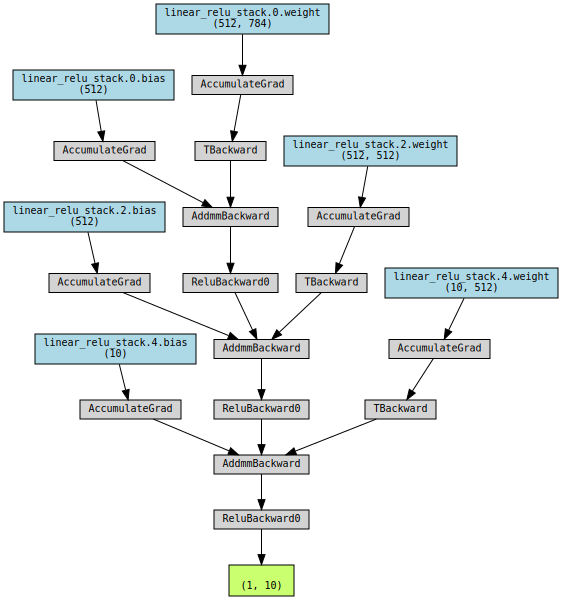

In [6]:
aa = make_dot(model(X), params=dict(list(model.named_parameters())))
aa

In [7]:
type(aa)

graphviz.dot.Digraph

In [8]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
              ReLU-7                   [-1, 10]               0
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


### 모델 계층 (Layer)

모델 계층을 시각화하면 위와 비슷한 양상을 보입니다.

In [9]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [10]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [11]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [12]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0807, -0.2589, -0.0957,  0.2967, -0.3082,  0.4276, -0.1602, -0.5288,
          0.3816, -0.1492,  0.0308,  0.5485,  0.0502, -0.1526, -0.3104, -0.3882,
          0.3278,  0.0647,  0.0028, -0.1640],
        [ 0.4731, -0.1465,  0.2431,  0.4254, -0.0772,  0.4390, -0.0431, -0.8381,
          0.2618, -0.0787,  0.1879,  0.4416,  0.1185, -0.0276, -0.6192, -0.4445,
          0.4505, -0.2892, -0.0196, -0.1399],
        [ 0.0489, -0.0246,  0.0413,  0.6126, -0.1297,  0.2066, -0.1695, -0.6360,
          0.0486,  0.1175, -0.1521,  0.2338,  0.2516, -0.0064, -0.4258, -0.2161,
          0.1696, -0.1796, -0.1411, -0.2533]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0807, 0.0000, 0.0000, 0.2967, 0.0000, 0.4276, 0.0000, 0.0000, 0.3816,
         0.0000, 0.0308, 0.5485, 0.0502, 0.0000, 0.0000, 0.0000, 0.3278, 0.0647,
         0.0028, 0.0000],
        [0.4731, 0.0000, 0.2431, 0.4254, 0.0000, 0.4390, 0.0000, 0.0000, 0.2618,
         0.0000, 0.1879, 0.4416, 0.1185, 0.0000, 0.000

## 실습 내용 (CNN)

In [13]:
class Net(nn.Module):
    ###############################
    #   밑줄 친 곳을 채워주세요!  #
    # 모델을 시각화한 그래프 참고 #
    ###############################

    def __init__(self):
        super(Net, self).__init__()
        # 입력 이미지 채널 1개, 출력 채널 32개, 커널 3x3, stride 1, padding= 1의 Conv layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # 입력 이미지 채널 32개, 출력 채널 64개, 커널 3x3, stride 1, padding= 1의 Conv layer
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        # 7*7은 이미지 차원에 해당
        self.fc1 = nn.Linear(64*7*7, 120, bias=True)  
        self.fc2 = nn.Linear(120, 84, bias=True)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # conv1에 relu 함수 적용
        x = F.relu(self.conv1(x))
        # 커널 2x2, stride 2의 max pooling
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # conv2에 relu 함수 적용
        x = F.relu(self.conv2(x))
        # 커널 2x2, stride 2의 max pooling
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # batch를 제외하고 flatten
        x = torch.flatten(x, 1) 
        # fc1에 relu 함수 적용
        x = F.relu(self.fc1(x))
        # fc2에 relu 함수 적용
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


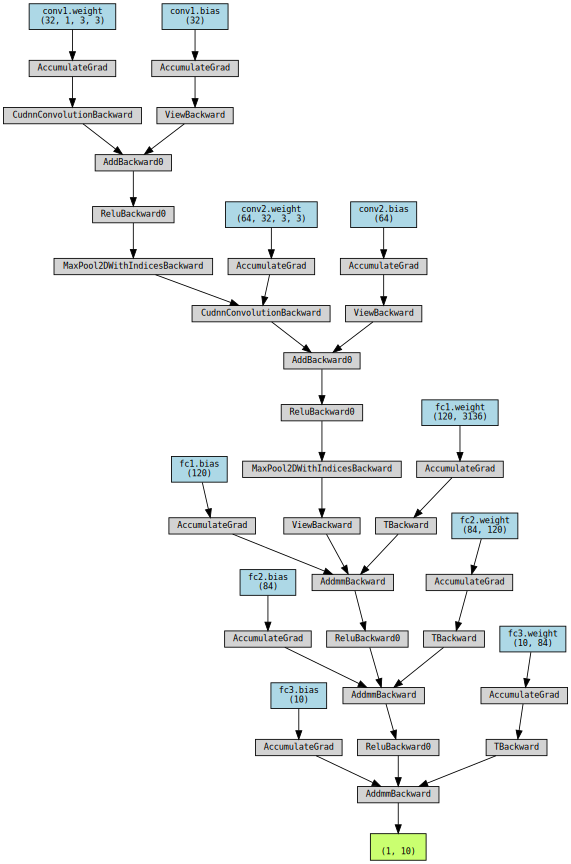

In [14]:
X = torch.rand(1, 1, 28, 28, device=device)
make_dot(net(X), params=dict(list(net.named_parameters())))

In [15]:
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 14, 14]          18,496
            Linear-3                  [-1, 120]         376,440
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 406,270
Trainable params: 406,270
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.29
Params size (MB): 1.55
Estimated Total Size (MB): 1.84
----------------------------------------------------------------


**다음과 같이 출력이 나와야합니다**

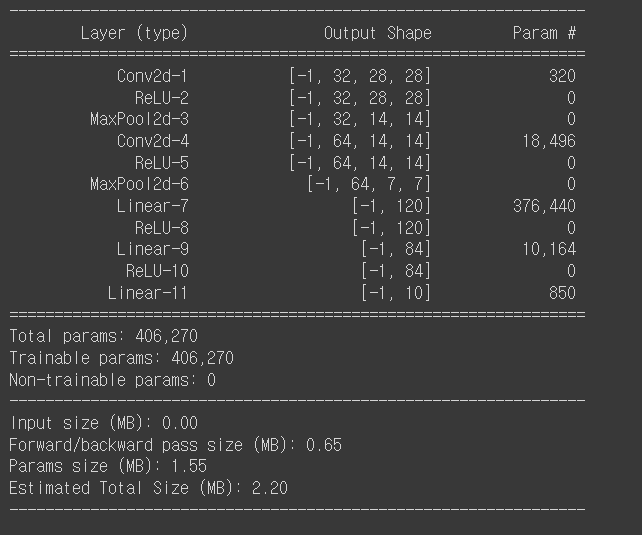

In [16]:
 X.shape

torch.Size([1, 1, 28, 28])

## 실습 내용 (VGG16)

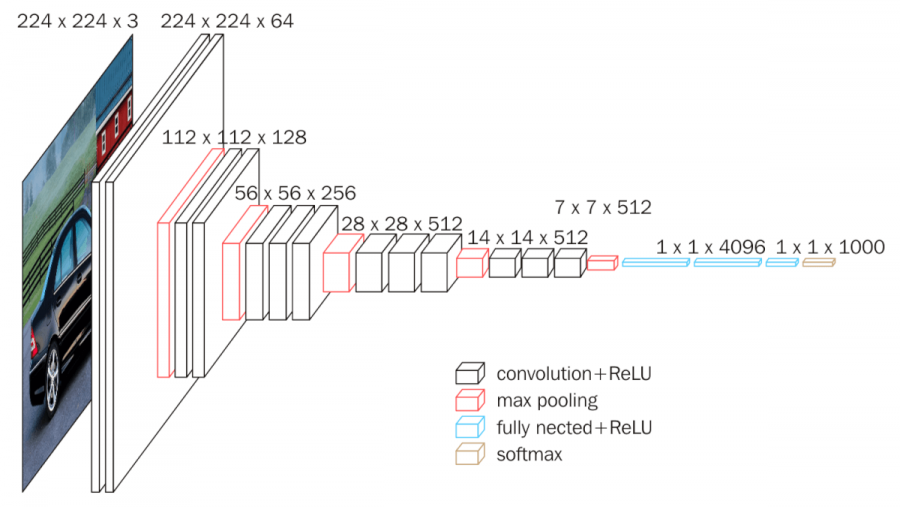

## Class 정의하기

In [17]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        
        input_channel = 3
        channels_size = [64, 128, 256, 512, 512]
        loop_coounts = [2, 2, 3, 3, 3]
        
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
        )
        self.avg_pool = nn.AvgPool2d(3)
        self.fc1 = nn.Linear(512*2*2,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,10)
        

    def forward(self, x):
        x = self.conv(x)
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

model = VGG16().to(device)
print(model)

VGG16(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.2)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): LeakyReLU(negative_slope=0.2)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.2)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): LeakyReLU(negative_slope=0.2)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): LeakyReLU(negative_slope=0.2)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): LeakyReLU(negative_sl

In [18]:
X = torch.rand(1, 3, 224, 224, device=device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
         LeakyReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
         LeakyReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
         LeakyReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
         LeakyReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
        LeakyReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
        LeakyReLU-14          [-1, 256,

**다음과 같이 출력이 나와야합니다.**

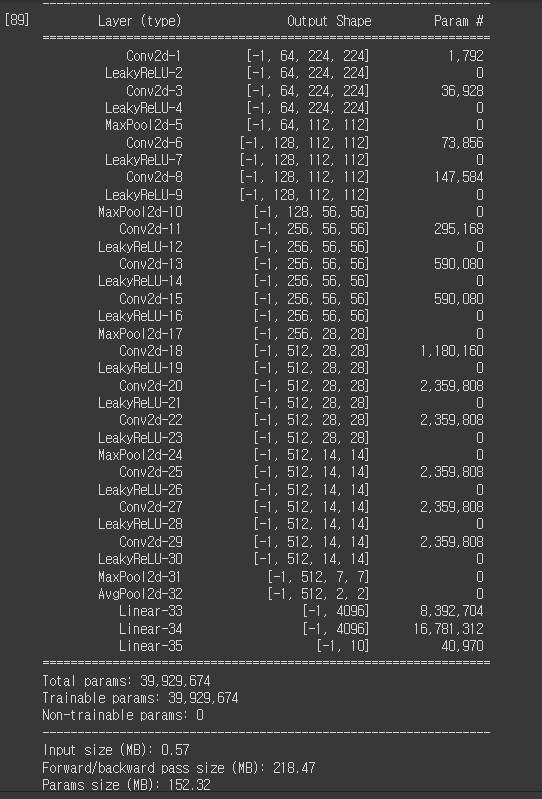